In [1]:
import pandas as pd
from pathlib import Path

In [2]:
rental_data_path = Path("C:/Users/jenna/Project-3/Lease_Length/Resources/data_booklet.csv")

rental_data = pd.read_csv(rental_data_path) 
rental_data.head()

,NUMUNITS_R,OUTCOME,SAMPSTRATA,ACCEPT,ADAGENCY,ADAGENT,ADNEWSPAPER,ADONLINE,ADOTHONLINE,ADVERTISE,...,YRNEWBLG_R,YRPROPACQ_R,YRMORT_R,OPTAX_R,APPVAL_R,CAPRATE_R,MORTAMT_R,OUTBAL_R,PMTAMT_R,LNCRDTAMT_R
0,24,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,6,-9,-9,-9,-8.0,-9,-9,-9,-9
1,12,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,7,-9,-9,-9,-8.0,-9,-9,-9,-9
2,8,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,-9,-9,-9,-9,-8.0,-9,-9,-9,-9
3,12,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,1,-9,-9,-9,-9.0,-9,-9,-9,-9
4,15,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,1,-9,-9,-9,-9.0,-9,-9,-9,-9


In [3]:
# Multiply the numbers in the columnms 'NUMUNITS_R' and 'WEIGHT' and reflect the output in the "NF" column - did this to get a comparison with the group to make sure our 'nf' column 
# was identical before proceeding
rental_data['NF'] = rental_data['NUMUNITS_R'].mul(rental_data['WEIGHT'])

print(rental_data.head())

   NUMUNITS_R  OUTCOME  SAMPSTRATA  ACCEPT  ADAGENCY  ADAGENT  ADNEWSPAPER  \
0          24        5           2      -9        -8       -8           -8   
1          12        5           2      -9        -8       -8           -8   
2           8        5           2      -9        -8       -8           -8   
3          12        5           2      -9        -8       -8           -8   
4          15        5           2      -9        -8       -8           -8   

   ADONLINE  ADOTHONLINE  ADVERTISE  ...  YRPROPACQ_R  YRMORT_R  OPTAX_R  \
0        -8           -8         -9  ...            6        -9       -9   
1        -8           -8         -9  ...            7        -9       -9   
2        -8           -8         -9  ...           -9        -9       -9   
3        -8           -8         -9  ...            1        -9       -9   
4        -8           -8         -9  ...            1        -9       -9   

   APPVAL_R  CAPRATE_R  MORTAMT_R  OUTBAL_R  PMTAMT_R  LNCRDTAMT_R  \
0   

In [4]:
my_columns = rental_data[['LOWRENT', 'HIRENT', 'LEASLNG', 'WEEKLNG', 'SENIOR', 'RCONTROL', 'RCONTROLAHS', 'NF']]

print(my_columns.head())

   LOWRENT  HIRENT  LEASLNG  WEEKLNG  SENIOR  RCONTROL  RCONTROLAHS  \
0       -9      -9       -8       -9      -9        -9           -9   
1      600     700       -8       -9      -9        -9           -9   
2     1400      -9       -8       -9      -9        -9           -9   
3      750     800       -8       -9      -9        -9           -9   
4       -9      -9       -8        2      -9        -9           -9   

             NF  
0   1183.097618  
1   9065.113258  
2    746.626760  
3    808.333800  
4  15299.180340  


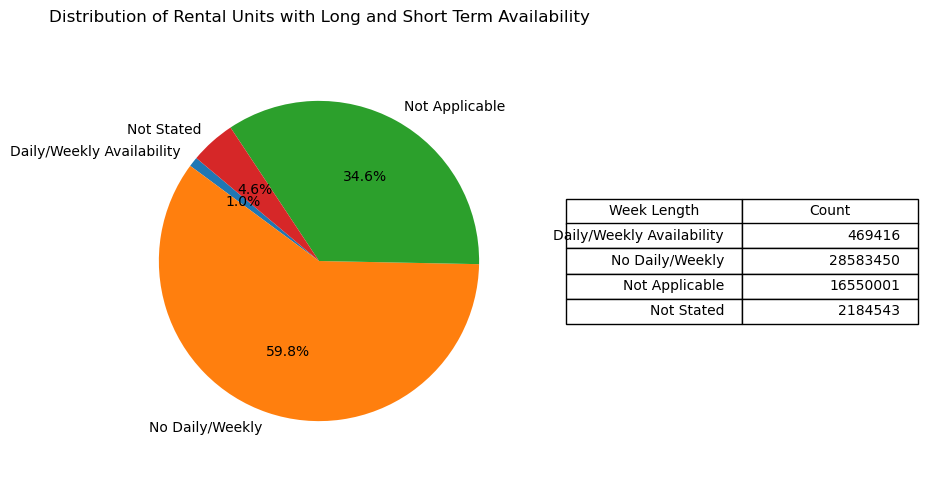

In [7]:
import matplotlib.pyplot as plt
import math

rental_data = pd.read_csv("C:/Users/jenna/Project-3/Lease_Length/Resources/data_booklet.csv")

# multiply the 'NUMUNITS_R' column data with the 'WEIGHT' column data to get an accurate representation of the actual rental unit count in the data
rental_data['NF'] = rental_data['NUMUNITS_R'] * rental_data['WEIGHT']

labels = {
    1: 'Daily/Weekly Availability',
    2: 'No Daily/Weekly',
    -8: 'Not Applicable',
    -9: 'Not Stated'
}

#focusing on the relevant columns for the circle graph
filtered_data = rental_data[['WEEKLNG', 'NF']]

# creating place to list the counts for the circle graph
counts = {label: 0 for label in labels}

# creating loop to get the counts from the 'NF' column
for index, row in filtered_data.iterrows():
    weeklng = row['WEEKLNG']
    nf = row['NF']
    if weeklng in labels:
        counts[weeklng] += nf

# I didn't like the long decimal points in the table, so rounding up the numbers for an easier view
for label in counts:
    counts[label] = math.ceil(counts[label])

# make sure labels are on the text of the graph instead of non-descript numbers from the raw data
cell_text = [[labels[label], count] for label, count in counts.items()]

#circle graph code
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(counts.values(), labels=labels.values(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rental Units with Long and Short Term Availability')
plt.axis('equal')

#table code
plt.subplot(1, 2, 2)
plt.axis('off')
table = plt.table(cellText=cell_text, colLabels=['Week Length', 'Count'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.savefig("C:/Users/jenna/Project-3/Lease_Length/graphs/circle.png")
plt.show()


c:\Users\jenna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


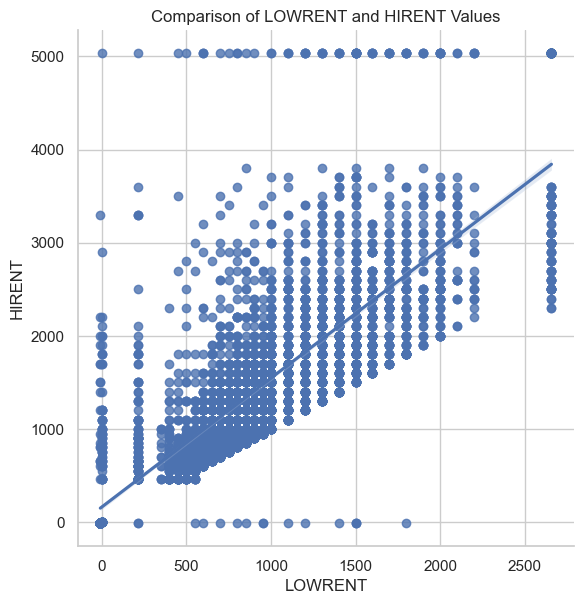

In [9]:
import seaborn as sns

# multiply the 'NUMUNITS_R' column data with the 'WEIGHT' column data to get an accurate representation of the actual rental unit count in the data
rental_data['NF'] = rental_data['NUMUNITS_R'] * rental_data['WEIGHT']

#plot the comparison chart
sns.set(style="whitegrid")
sns.lmplot(x='LOWRENT', y='HIRENT', data=rental_data, height=6)
plt.title('Comparison of LOWRENT and HIRENT Values')
plt.xlabel('LOWRENT')
plt.ylabel('HIRENT')

plt.savefig("C:/Users/jenna/Project-3/Lease_Length/graphs/linear_graph.png")
plt.show()

c:\Users\jenna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jenna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


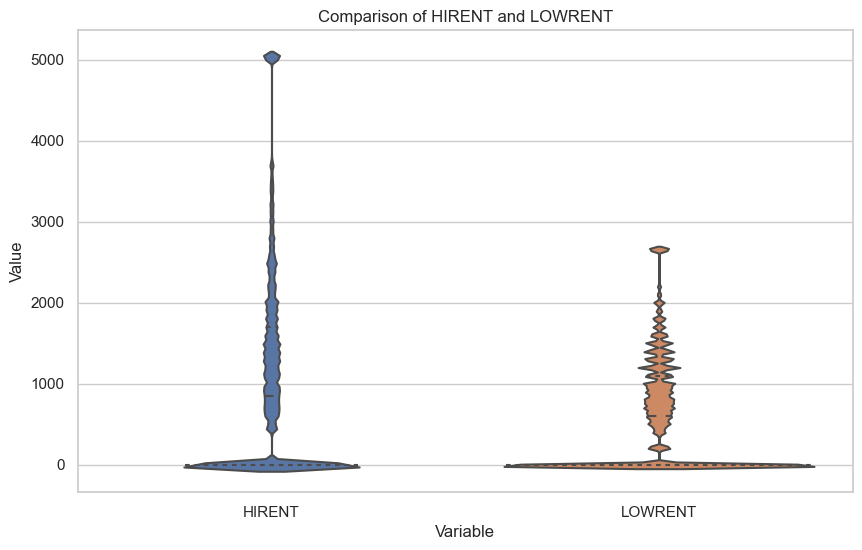

In [12]:
#creating a list to hold the info from multiplying figures from established columns with the 'nf' column
data_frames = []

#creating for loop through the rental_data dataframe
for _, row in rental_data.iterrows():
    nf = int(row['NF'])
    # Create a new dataframe for the LOWRENT and HIRENT rows after being multiplied by the data in the 'nf' rows
    repeated_data = pd.DataFrame({'LOWRENT': [row['LOWRENT']] * nf, 'HIRENT': [row['HIRENT']] * nf})
    #put the outcome of the multiplied rows in the the data_frames list
    data_frames.append(repeated_data)

#combine the string data into one dataframe
expanded_data = pd.concat(data_frames, ignore_index=True)

# Create a violin plot comparing HIRENT and LOWRENT columns
plt.figure(figsize=(10, 6))
sns.violinplot(data=expanded_data[['HIRENT', 'LOWRENT']], inner="quartile")
plt.title('Comparison of HIRENT and LOWRENT')
plt.xlabel('Variable')
plt.ylabel('Value')

plt.savefig("C:/Users/jenna/Project-3/Lease_Length/graphs/violin_plot.png")
plt.show()

<Figure size 1000x600 with 0 Axes>

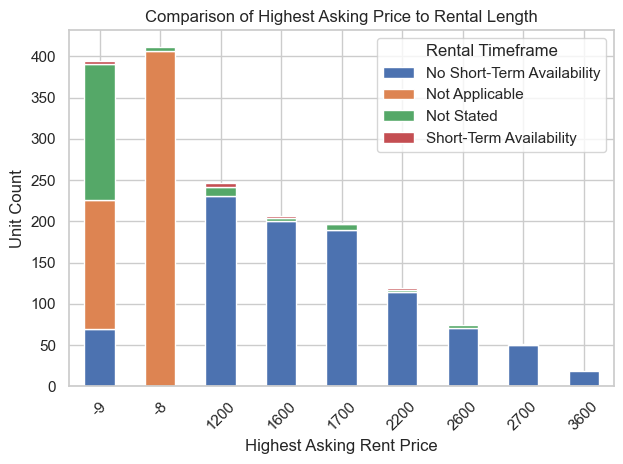

In [13]:
rental_data = pd.read_csv("C:/Users/jenna/Project-3/Lease_Length/Resources/data_booklet.csv")

# multiply the 'NUMUNITS_R' column data with the 'WEIGHT' column data to get an accurate representation of the actual rental unit count in the data
rental_data['NF'] = rental_data['NUMUNITS_R'] * rental_data['WEIGHT']

# list readable titles for the table instead of the numerical value from the raw data
rental_data['WEEKLNG'] = rental_data['WEEKLNG'].replace({
    -9: 'Not Stated',
    -8: 'Not Applicable',
    1: 'Short-Term Availability',
    2: 'No Short-Term Availability'
})

#group by 'HIRENT' and 'WEEKLNG' and multiply by 'nf' to get an accurate unit count
grouped_data = rental_data.groupby(['HIRENT', 'WEEKLNG']).size().unstack(fill_value=0)

#going to chart every 5th value on the x-axis because listing all values on the x-axis was too messy
selected_hirent = rental_data['HIRENT'].unique()[::5]

#filter grouped_data to include only selected_hirent values
grouped_data = grouped_data.loc[selected_hirent]
grouped_data_sorted = grouped_data.sort_index()

#list the x-axis in numerical order from lowest to highest
grouped_data_sorted = grouped_data.sort_index()

#plot the bar chart
plt.figure(figsize=(10, 6))
grouped_data_sorted.plot(kind='bar', stacked=True)
plt.title('Comparison of Highest Asking Price to Rental Length')
plt.xlabel('Highest Asking Rent Price')
plt.ylabel('Unit Count')
plt.xticks(rotation=45)
plt.legend(title='Rental Timeframe')
plt.tight_layout()

plt.savefig("C:/Users/jenna/Project-3/Lease_Length/graphs/highest_rent_bar_chart.png")
plt.show()


<Figure size 1000x600 with 0 Axes>

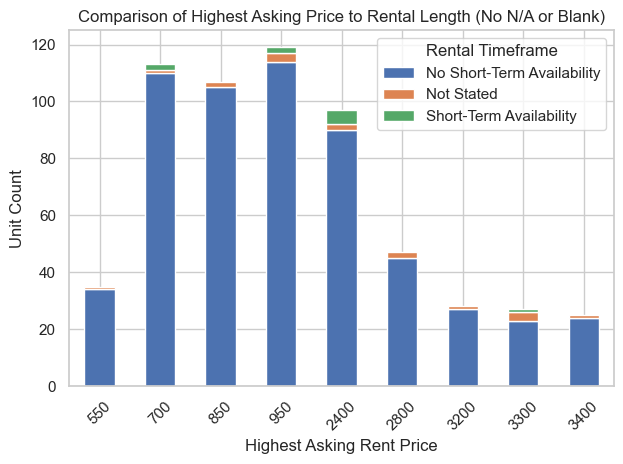

In [14]:
#remove rows with values -8 and -9 in the HIRENT column to just show yes or no answers from the data
rental_data = rental_data[~rental_data['HIRENT'].isin([-8, -9])]

#  list readable titles for the table instead of the numerical value from the raw data
rental_data['WEEKLNG'] = rental_data['WEEKLNG'].replace({
    -9: 'Not Stated',
    -8: 'Not Applicable',
    1: 'Short-Term Availability',
    2: 'No Short-Term Availability'
})

# group by 'HIRENT' and 'WEEKLNG' and multiply by 'nf' to get an accurate unit count
grouped_data = rental_data.groupby(['HIRENT', 'WEEKLNG']).size().unstack(fill_value=0)

#going to chart every 5th value on the x-axis because listing all values on the x-axis was too messy
selected_hirent = rental_data['HIRENT'].unique()[::5]

#filter grouped_data to include only selected_hirent values
grouped_data = grouped_data.loc[selected_hirent]
grouped_data_sorted = grouped_data.sort_index()

#plot the bar chart
plt.figure(figsize=(10, 6))
grouped_data_sorted.plot(kind='bar', stacked=True)
plt.title('Comparison of Highest Asking Price to Rental Length (No N/A or Blank)')
plt.xlabel('Highest Asking Rent Price')
plt.ylabel('Unit Count')
plt.xticks(rotation=45)
plt.legend(title='Rental Timeframe')
plt.tight_layout()

plt.savefig("C:/Users/jenna/Project-3/Lease_Length/graphs/highest_rent_bar_chart_no_na.png")
plt.show()

<Figure size 1000x600 with 0 Axes>

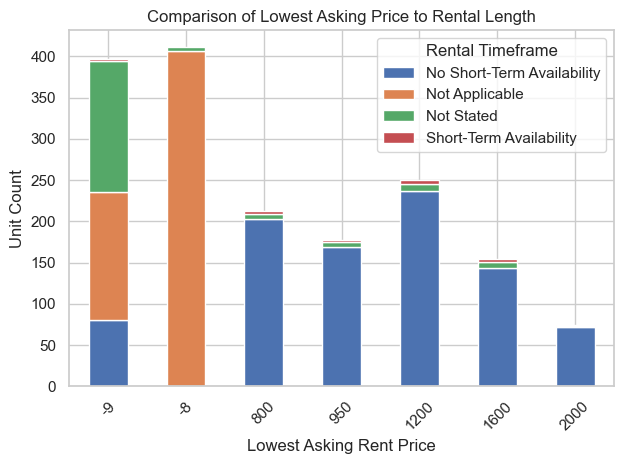

In [15]:
rental_data = pd.read_csv("C:/Users/jenna/Project-3/Lease_Length/Resources/data_booklet.csv")

# multiply the 'NUMUNITS_R' column data with the 'WEIGHT' column data to get an accurate representation of the actual rental unit count in the data
rental_data['NF'] = rental_data['NUMUNITS_R'] * rental_data['WEIGHT']

# list readable titles for the table instead of the numerical value from the raw data
rental_data['WEEKLNG'] = rental_data['WEEKLNG'].replace({
    -9: 'Not Stated',
    -8: 'Not Applicable',
    1: 'Short-Term Availability',
    2: 'No Short-Term Availability'
})

#group by LOWRENT and 'WEEKLNG' and multiply by 'nf' to get an accurate unit count
grouped_data = rental_data.groupby(['LOWRENT', 'WEEKLNG']).size().unstack(fill_value=0)

#going to chart every 5th value on the x-axis because listing all values on the x-axis was too messy
selected_hirent = rental_data['LOWRENT'].unique()[::5]

#filter grouped_data to include only selected_hirent values
grouped_data = grouped_data.loc[selected_hirent]
grouped_data_sorted = grouped_data.sort_index()

#list the x-axis in numerical order from lowest to highest
grouped_data_sorted = grouped_data.sort_index()

#plot the bar chart
plt.figure(figsize=(10, 6))
grouped_data_sorted.plot(kind='bar', stacked=True)
plt.title('Comparison of Lowest Asking Price to Rental Length')
plt.xlabel('Lowest Asking Rent Price')
plt.ylabel('Unit Count')
plt.xticks(rotation=45)
plt.legend(title='Rental Timeframe')
plt.tight_layout()

plt.savefig("C:/Users/jenna/Project-3/Lease_Length/graphs/lowest_rent_bar_chart.png")
plt.show()

<Figure size 1000x600 with 0 Axes>

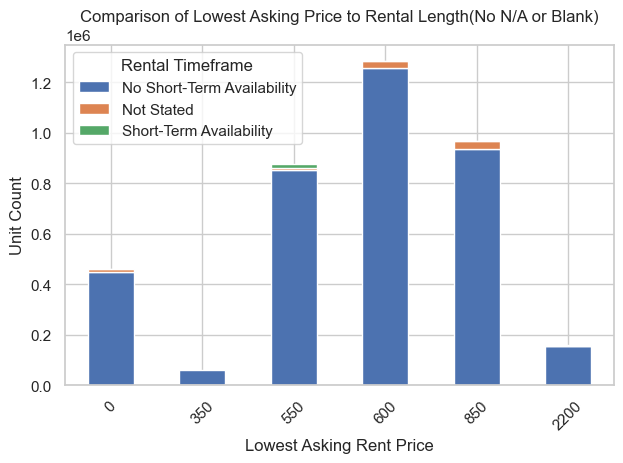

In [16]:
#remove rows with values -8 and -9 in the HIRENT column to just show yes or no answers from the data
rental_data = rental_data[~rental_data['LOWRENT'].isin([-8, -9])]

# group by LOWRENT and 'WEEKLNG' and multiply by 'nf' to get an accurate unit count
grouped_data = rental_data.groupby(['LOWRENT', 'WEEKLNG'])['NF'].sum().unstack(fill_value=0)

#going to chart every 5th value on the x-axis because listing all values on the x-axis was too messy
selected_lowrent = rental_data['LOWRENT'].unique()[::5]

#filter grouped_data to include only selected_hirent values
grouped_data = grouped_data.loc[selected_lowrent]
grouped_data_sorted = grouped_data.sort_index()

#plot the bar chart
plt.figure(figsize=(10, 6))
grouped_data_sorted.plot(kind='bar', stacked=True)
plt.title('Comparison of Lowest Asking Price to Rental Length(No N/A or Blank)')
plt.xlabel('Lowest Asking Rent Price')
plt.ylabel('Unit Count')
plt.xticks(rotation=45)
plt.legend(title='Rental Timeframe')
plt.tight_layout()

plt.savefig("C:/Users/jenna/Project-3/Lease_Length/graphs/lowest_rent_bar_chart_no_na.png")
plt.show()